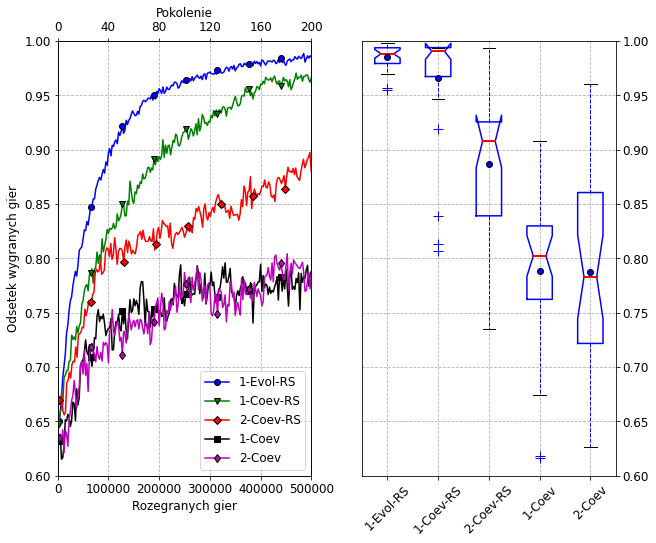

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt

def dane(ścieżka, plik):
    with open(ścieżka + plik) as f:
        lines = f.readlines()
    y, x_1, x_2 = [], [], []
    for line in lines[1:]:
        line = list(map(float, line.strip('\n').split(',')))
        y.append(sum(line[2:])/len(line[2:]))
        x_1.append(line[0])
        x_2.append(line[1])
    last = list(map(float, lines[-1].strip('\n').split(',')))[2:]
    return x_1, x_2, y, last

def main():
    
    plt.rcParams['font.size'] = '12'
    
    ścieżka = '1. Python – Dane do zadania-20211011/'
    plik = ['1evolrs.csv', '1coevrs.csv', '2coevrs.csv', '1coev.csv', '2coev.csv']
    opis = ['1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev']
    linia = ['bo-', 'gv-', 'rD-', 'ks-', 'md-']
    
    fig = plt.subplots(figsize=(10, 8))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    box=[]
    for i in range(len(plik)):
        x_1, x_2, y, last = dane(ścieżka, plik[i])
        ax1.plot(x_2, y, linia[i], label=opis[i], markevery=25, markeredgecolor='k')
        box.append(last)
    ax2.boxplot(box, notch=True, showmeans=True,
                boxprops=dict(linewidth=1.5, color='b'),
                whiskerprops=dict(linestyle='--', color='b'),
                meanprops=dict(marker='o', markeredgecolor='k', markerfacecolor='b'),
                medianprops=dict(color='r', linewidth=2),
                flierprops=dict(marker='+', markeredgecolor='blue', markersize=10))
    
    ax1.set_xlabel("Rozegranych gier")
    ax1.set_xlim(0, 500000)
    ax1.set_ylabel("Odsetek wygranych gier")
    ax1.set_ylim(0.6, 1)
    ax = ax1.twiny()
    ax.set_xlabel("Pokolenie")
    ax.set_xticks(range(0, 201, 40))
    
    ax2.set_xticklabels(opis, rotation=45)
    ax2.set_ylim(0.6, 1)
    ax2.yaxis.tick_right()
    
    ax1.grid(linestyle="--")
    ax2.grid(linestyle="--")
    ax1.grid(True)
    ax2.grid(True)
    ax1.legend(loc=4)
    
    plt.show()
    plt.savefig('myplot.pdf')
    plt.close()


if __name__ == '__main__':
    main()